In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math
import matplotlib.pyplot as plt
from pprint import pprint
sb.set()

In [2]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)

In [3]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import os

Using TensorFlow backend.


In [4]:
Stocks = pd.read_csv('Data\Stocks\S&P 500 (^GSPC)_2005to2018_daily.csv')
Stocks["Average"] = (Stocks["High"] + Stocks["Low"])/2
Stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Average
0,31/12/2004,1213.550049,1217.329956,1211.650024,1211.920044,1211.920044,786900000,1214.489990
1,3/1/2005,1211.920044,1217.800049,1200.319946,1202.079956,1202.079956,1510800000,1209.059998
2,4/1/2005,1202.079956,1205.839966,1185.390015,1188.050049,1188.050049,1721000000,1195.614990
3,5/1/2005,1188.050049,1192.729980,1183.719971,1183.739990,1183.739990,1738900000,1188.224976
4,6/1/2005,1183.739990,1191.630005,1183.270020,1187.890015,1187.890015,1569100000,1187.450012


In [5]:
d1 = pd.read_excel("Data/World Happiness Report/WHR2019.xlsx", sheet_name='Table2.1')
US_Data =  pd.DataFrame(d1[(d1['Country name'] == "United States")])
US_Data_LL = list(US_Data['Life Ladder'])




x = np.array(tuple(range(1,14)))
y = np.array(US_Data_LL)
z = np.polyfit(x, y, 5)
f = np.poly1d(z)
x_new = np.linspace(0, 13, 3270)
y_new = f(x_new)
print("The interpolated y-values are:\n", y_new)
print("Total:", len(y_new), "datapoints generated for this specific diagram.")
trace1 = go.Scatter(
    x=x,
    y=y,
    mode='markers',
    name='Data',
    marker=dict(
        size=12))
trace2 = go.Scatter(
    x=x_new,
    y=y_new,
    mode='lines',
    name='Fit')
annotation = go.Annotation(
    x=1,
    y=1,
    showarrow=False)
layout = go.Layout(title='Polynomial Fit in Python',
                   annotations=[annotation])
data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)
iplot(fig)

The interpolated y-values are:
 [6.53027733 6.53453898 6.53878629 ... 6.9398976  6.94111485 6.94233933]
Total: 3270 datapoints generated for this specific diagram.


C:\ProgramData\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:144: DeprecationWarning:

plotly.graph_objs.Annotation is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Annotation
  - plotly.graph_objs.layout.scene.Annotation




In [6]:
Values_for_13yr = pd.DataFrame({'Happiness': y_new})
Values_for_13yr.head()

Stocks_2006 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2006')])
Stocks_2007 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2007')])
Stocks_2008 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2008')])
Stocks_2009 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2009')])
Stocks_2010 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2010')])
Stocks_2011 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2011')])
Stocks_2012 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2012')])
Stocks_2013 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2013')])
Stocks_2014 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2014')])
Stocks_2015 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2015')])
Stocks_2016 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2016')])
Stocks_2017 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2017')])
Stocks_2018 = pd.DataFrame(Stocks[Stocks['Date'].str.contains('/2018')])

frames = [Stocks_2006, Stocks_2007, Stocks_2008, Stocks_2009, Stocks_2010, Stocks_2011, Stocks_2012, Stocks_2013, Stocks_2014, 
          Stocks_2015, Stocks_2016, Stocks_2017, Stocks_2018]
Resulting_Data = pd.concat(frames)

Resulting_Data.reset_index(drop=True)
Resulting_Data.index = np.arange(1, len(Resulting_Data)+1)
Values_for_13yr.reset_index(drop=True)
Values_for_13yr.index = np.arange(1, len(Resulting_Data)+1)
Stocks = LLwithStocks = Resulting_Data.join(Values_for_13yr)
Stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Average,Happiness
1,3/1/2006,1248.290039,1270.219971,1245.739990,1268.800049,1268.800049,2554570000,1257.979981,6.530277
2,4/1/2006,1268.800049,1275.369995,1267.739990,1273.459961,1273.459961,2515330000,1271.554993,6.534539
3,5/1/2006,1273.459961,1276.910034,1270.300049,1273.479980,1273.479980,2433340000,1273.605041,6.538786
4,6/1/2006,1273.479980,1286.089966,1273.479980,1285.449951,1285.449951,2446560000,1279.784973,6.543019
5,9/1/2006,1285.449951,1290.780029,1284.819946,1290.150024,1290.150024,2301490000,1287.799988,6.547238


In [7]:
df = Stocks['Average'].values
df = df.reshape(-1, 1)
print(df.shape)

dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])
print(dataset_train.shape)
print(dataset_test.shape)

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)
print(x_train.shape)
print(x_test.shape)

# Reshape features for LSTM Layer
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_train.shape)

model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

print(model.summary())

model.compile(loss='mean_squared_error', 
              optimizer='adam',
              metrics=['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'cosine_proximity'])

if(not os.path.exists('stock_prediction.h5')):
    model.fit(x_train, y_train, epochs=50, batch_size=32)
    model.save('stock_prediction.h5')

model = load_model('stock_prediction.h5')

(3270, 1)
(2616, 1)
(704, 1)
(2566, 50)
(654, 50)
(2566, 50, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 96)            37632     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 96)            74112     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50, 96)            74112     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_4 (LSTM

2566/2566 [==============================] - 12s 5ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 19899.4197 - cosine_proximity: -0.9988
Epoch 32/50
2566/2566 [==============================] - 11s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 9928.6273 - cosine_proximity: -0.9981
Epoch 33/50
2566/2566 [==============================] - 12s 5ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 6579.2266 - cosine_proximity: -0.9988
Epoch 34/50
2566/2566 [==============================] - 11s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 3779.7697 - cosine_proximity: -0.9988
Epoch 35/50
2566/2566 [==============================] - 11s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0258 - m

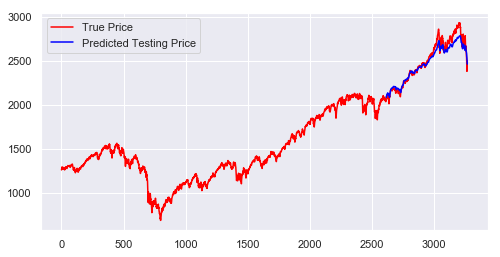

In [8]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df, color='red',  label="True Price")
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Testing Price')
plt.legend()

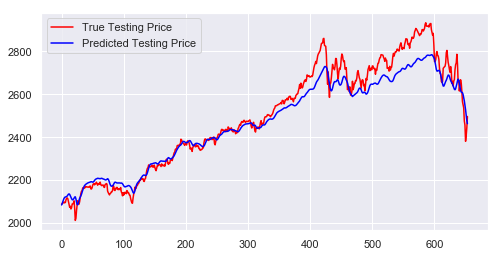

In [9]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label='True Testing Price')
plt.plot(predictions, color='blue', label='Predicted Testing Price')
plt.legend()

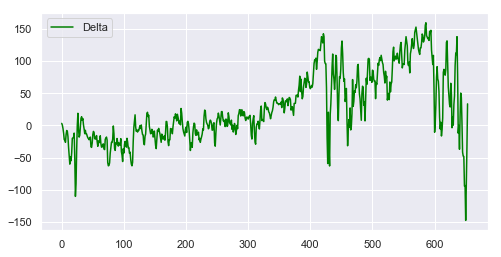

In [10]:
delta = y_test_scaled - predictions

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(delta, color='green', label='Delta')
plt.legend()

In [11]:
# metrics = ['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'cosine_proximity']
model_metric = ['MSE', 'MAE', 'MAPE', 'CP']

score = model.evaluate(x_test, y_test, verbose=1)
for i in range(len(model_metric)):
    if i==0:
        print()
    print(model_metric[i] + ":\t", score[i])

654/654 [==============================] - 2s 3ms/step

MSE:	 0.001717165120327646
MAE:	 0.001717165120327646
MAPE:	 0.030726534590717485
CP:	 2.29687718951374


# FUNCTION to create LSTM model, 2 features

In [12]:
# Functions for LSTM model
# Input: feature_list, trained_model_name
# Returns: model, x_train, y_train, x_test, y_test, scaler

def create_dataset_2features(df):
        lookback = 50
        x = []
        y = []
        for i in range(lookback, df.shape[0]):
            x.append(df[i-lookback:i, :])
            y.append(df[i, 0])
        x = np.array(x)
        y = np.array(y)
        return x,y

def LSTM_2feature(feature_list=['Average', 'Volume'], trained_model_name="stock_prediction.h5"):
    df = Stocks[feature_list].values
    df = df.reshape(-1, len(feature_list))
    print(df.shape)

    lookback = 50
    
    dataset_train = np.array(df[:int(df.shape[0]*0.8)])
    dataset_test = np.array(df[int(df.shape[0]*0.8)-lookback:])
    print(dataset_train.shape)
    print(dataset_test.shape)

    scaler = MinMaxScaler(feature_range=(0,1))
    dataset_train = scaler.fit_transform(dataset_train)
    dataset_test = scaler.transform(dataset_test) 

    x_train, y_train = create_dataset_2features(dataset_train)
    x_test, y_test = create_dataset_2features(dataset_test)

    # Reshape features for LSTM Layer
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 2))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 2)) 
    print(x_train.shape)

    model = Sequential()
    model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], len(feature_list))))
    model.add(Dropout(0.2))
    model.add(LSTM(units=96, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=96, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=96))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    print(model.summary())

    model.compile(loss='mean_squared_error', 
                  optimizer='adam',
                  metrics=['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'cosine_proximity'])

    if(not os.path.exists(trained_model_name)):
        model.fit(x_train, y_train, epochs=50, batch_size=32)
        model.save(trained_model_name)

    model = load_model(trained_model_name)
    
    return model, x_train, y_train, x_test, y_test, scaler

In [13]:
# Functions for Graph and Metrics
# Input: model, x_train, y_train, x_test, y_test, scaler
# prints: metrics and graph

def metrics_and_graph(model=None, x_train=None, y_train=None, x_test=None, y_test=None, scaler1D=scaler, feature=None):
    
    # metrics = ['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'cosine_proximity']
    model_metric = ['MSE', 'MAE', 'MAPE', 'CP']

    score = model.evaluate(x_test, y_test, verbose=1)
    for i in range(len(model_metric)):
        if i==0:
            print()
        print(model_metric[i] + ":\t", score[i])
    
    
    df = Stocks['Average'].values

    
    predictions = model.predict(x_test)
    predictions = scaler1D.inverse_transform(predictions)

    fig, ax = plt.subplots(figsize=(8,4))
    plt.title("Average Stock Price Prediction using " + feature)
    plt.xlabel("Time (oldest -> latest)")
    plt.plot(df, color='red',  label="True Price")
    ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Testing Price')
    plt.legend()
    
    y_test_scaled = scaler1D.inverse_transform(y_test.reshape(-1, 1))

    fig, ax = plt.subplots(figsize=(8,4))
    plt.title("Zoom in (test predictions)")
    plt.xlabel("Time (oldest -> latest)")
    ax.plot(y_test_scaled, color='red', label='True Testing Price')
    plt.plot(predictions, color='blue', label='Predicted Testing Price')
    plt.legend()

    delta = y_test_scaled - predictions

    fig, ax = plt.subplots(figsize=(8,4))
    plt.title("Delta (y_test - predictions)")
    plt.xlabel("Time (oldest -> latest)")
    ax.plot(delta, color='green', label='Delta')
    plt.legend()

In [14]:
# Average and Volume Analysis
model_happiness, x_train_happiness, y_train_happiness, x_test_happiness, y_test_happiness, scaler_happiness = LSTM_2feature(feature_list=['Average', 'Happiness'], trained_model_name="stock_prediction_happiness.h5")

(3270, 2)
(2616, 2)
(704, 2)
(2566, 50, 2)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 50, 96)            38016     
_________________________________________________________________
dropout_5 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 50, 96)            74112     
_________________________________________________________________
dropout_6 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 50, 96)            74112     
_________________________________________________________________
dropout_7 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_8 (LSTM)                (Non

2566/2566 [==============================] - 12s 5ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 19527.9380 - cosine_proximity: -0.9981
Epoch 31/50
2566/2566 [==============================] - 13s 5ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 16222.2809 - cosine_proximity: -0.9988
Epoch 32/50
2566/2566 [==============================] - 13s 5ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 5479.6784 - cosine_proximity: -0.9988
Epoch 33/50
2566/2566 [==============================] - 13s 5ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 18897.6527 - cosine_proximity: -0.9973
Epoch 34/50
2566/2566 [==============================] - 13s 5ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0252 -

654/654 [==============================] - 2s 4ms/step

MSE:	 0.02176378153560723
MAE:	 0.02176378153560723
MAPE:	 0.11595809819683751
CP:	 8.458813018390527


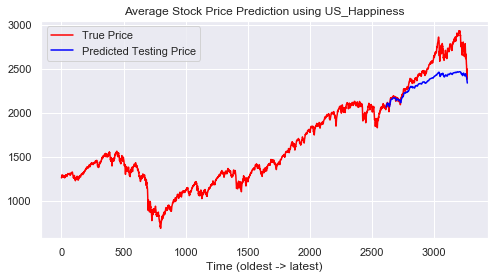

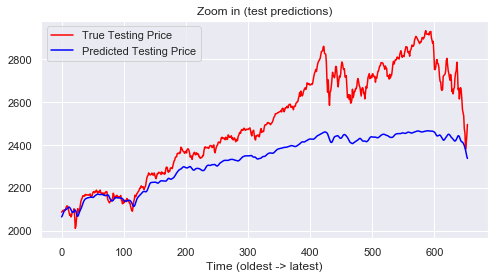

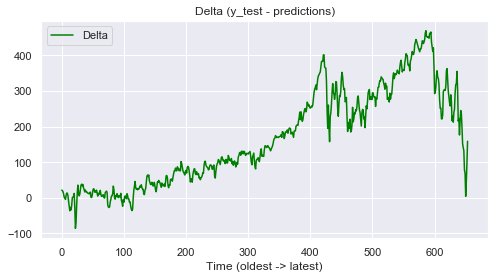

In [15]:
metrics_and_graph(model_happiness, x_train_happiness, y_train_happiness, x_test_happiness, y_test_happiness, feature="US_Happiness")